In [3]:
import sklearn
import numpy

In [18]:
import h5py

hdf5_store = h5py.File("./cache4.hdf5", "a")
results = hdf5_store.create_dataset("results", (1000, 500), dtype='f', compression="gzip")

# do something...
results[1, 1] = 42
# This creates a file cache.hdf5 which will contain the data. create_dataset gets us an object that we can treat just like a numpy array (at least most of the time). Additionally we get a file that contains this array and that we can access from other scripts:


In [19]:
hdf5_store = h5py.File("./cache4.hdf5", "r")

print(hdf5_store["results"]) # 42.0

<HDF5 dataset "results": shape (1000, 500), type "<f4">


In [20]:
hdf5_store

<HDF5 file "cache4.hdf5" (mode r+)>

In [21]:
results[1, 1]

42.0

In [22]:
hdf5_store["results"]

<HDF5 dataset "results": shape (1000, 500), type "<f4">

In [23]:
from sklearn.cluster import MiniBatchKMeans

In [24]:
model = MiniBatchKMeans()
model.fit(hdf5_store["results"])

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=8,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [27]:
import numpy as np

In [32]:
# https://stackoverflow.com/questions/26214696/creating-very-large-numpy-arrays-in-small-chunks-pytables-vs-numpy-memmap/29434454

mmapFile = 'mmapFile'
smallarray_size = 100
number_of_arrays = 100

mmapData = np.memmap(mmapFile, mode='w+', shape = (smallarray_size, number_of_arrays), dtype ='float64')

for k in range(number_of_arrays):
    smallarray = np.fromfile(list_of_files[k]) # list_of_file is the list with the files name
    smallarray = do_something_with_array(smallarray)
    mmapData[:,k] = smallarray

In [42]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.memmap.html#numpy.memmap
# https://stackoverflow.com/questions/16149803/working-with-big-data-in-python-and-numpy-not-enough-ram-how-to-save-partial-r?lq=1

In [43]:
# import numpy
# a = numpy.memmap('test.mymemmap', dtype='float32', mode='w+', shape=(200000,10000))
# # here you will see a 762MB file created in your working directory 

In [55]:
SHAPE = (4000, 2000)

In [69]:
b = numpy.memmap('test2.mymemmap', dtype='float32', mode='w+', shape=SHAPE)

In [70]:
%%time
for i in range(b.shape[0]):
    for j in range(b.shape[1]):
        b[i, j] = np.random.randint(10000)

CPU times: user 12.8 s, sys: 40.7 ms, total: 12.9 s
Wall time: 12.9 s


In [71]:
a = np.zeros(shape=SHAPE)

In [72]:
%%time
for i in range(b.shape[0]):
    for j in range(b.shape[1]):
        a[i, j] = np.random.randint(10000)

CPU times: user 12.7 s, sys: 47.5 ms, total: 12.7 s
Wall time: 12.8 s


In [73]:
a[1, 1]

3487.0

In [74]:
b[1, 1]

7873.0

In [75]:
c = numpy.memmap('test2.mymemmap', dtype='float32', mode='r+', shape=SHAPE)

In [76]:
c[1, 1]

7873.0

In [34]:
model = MiniBatchKMeans()
model.fit(a)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=8,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [1]:
import h5py

In [2]:
import dask

In [3]:
import dask_ml.datasets
import dask_ml.cluster
import matplotlib.pyplot as plt

In [10]:
X, y = dask_ml.datasets.make_blobs(n_samples=10000000,
                                   chunks=1000000,
                                   random_state=0,
                                   centers=3)
X = X.persist()
X

dask.array<from-value, shape=(10, 2), dtype=float64, chunksize=(10, 2)>

In [15]:
X[1, 1]

TypeError: 'Array' object is not callable

In [12]:
km = dask_ml.cluster.KMeans(n_clusters=3, init_max_iter=2, oversampling_factor=10)
km.fit(X)

KMeans(algorithm='full', copy_x=True, init='k-means||', init_max_iter=2,
    max_iter=300, n_clusters=3, n_jobs=1, oversampling_factor=10,
    precompute_distances='auto', random_state=None, tol=0.0001)

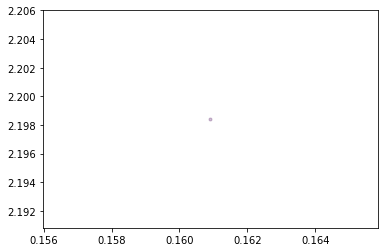

In [13]:
fig, ax = plt.subplots()
ax.scatter(X[::10000, 0], X[::10000, 1], marker='.', c=km.labels_[::10000],
           cmap='viridis', alpha=0.25);

In [18]:
import numpy as np

In [45]:
array = np.array([
    [1, 2, 3],
    [2, 3, 4],
    [2, 3, 4],
    [2, 3, 4],
])

In [82]:
def f(arr):
    print(arr)
    arr[0] = 66
    print(arr)

In [86]:
f(array[1:, 1])

[342435      3      3]
[66  3  3]


In [87]:
array

array([[88,  2,  3],
       [ 2, 66,  4],
       [ 2,  3,  4],
       [ 2,  3,  4]])